In [2]:
import pennylane as qml
import pennylane.numpy as np

# $\hat{V}_{QA}$

In [4]:
def prepare_Q(U, wires):
    """Prepares Q into the quantum state defined by the unitary U

    Args:
        U (array[complex]): the matrix U to apply to the fiduciary quantum state of Q
        wires (array[int]): the wires representing Q. If Q is a single-qubit, then this should be an array of length 1.
    """
    # Is this the correct way to prepare the Q state?
    qml.QubitUnitary(U, wires)

In [5]:
def prepare_V_QA(alpha, wires):
    """Prepares the V_QA parametric gate given the vector alpha for a Q with k=1 qubits

    Args:
        alpha (array[complex]): The alpha vector containing the angles used for rotation in the Pauli operators
        wires (array[int]): The wires to act on. wires[0] should represent Q, and wires[1..2] shoudl represent A
    """
    # First two gates for each wire
    qml.RY(alpha[0], wires=wires[0])
    qml.RX(alpha[1], wires=wires[0])

    qml.RY(alpha[6], wires=wires[1])
    qml.RX(alpha[7], wires=wires[1])

    qml.RY(alpha[12], wires=wires[2])
    qml.RX(alpha[13], wires=wires[2])

    # Controlled on wire 0
    qml.CRX(alpha[8], wires=[wires[0], wires[1]])
    qml.CRX(alpha[14], wires=[wires[0], wires[2]])

    # Controlled on wire 1
    qml.CRX(alpha[2], wires=[wires[1], wires[0]])
    qml.CRX(alpha[15], wires=[wires[1], wires[2]])

    # Controlled on wire 2
    qml.CRX(alpha[3], wires=[wires[2], wires[0]])
    qml.CRX(alpha[9], wires=[wires[2], wires[1]])

    # Last two gates for each wire
    qml.RY(alpha[4], wires=wires[0])
    qml.RX(alpha[5], wires=wires[0])

    qml.RY(alpha[10], wires=wires[1])
    qml.RX(alpha[11], wires=wires[1])

    qml.RY(alpha[16], wires=wires[2])
    qml.RX(alpha[17], wires=wires[2])

# $\hat{W}_{QAB}$

In [6]:
def prepare_W_QAB(beta, wires):
    """Prepares the W_QAB parametric gate given the vector beta for a Q with k=1 qubits

    Args:
        beta (array[complex]): The beta vector containing the angles used for rotation in the Pauli operators
        wires (array[int]): The wires to act on. wires[0] should represent Q, wires[1..2] should represent A, and wires[3..4] should represent B
    """
    # First two gates for each wire
    qml.RY(beta[0], wires=wires[0])
    qml.RX(beta[1], wires=wires[0])

    qml.RY(beta[10], wires=wires[1])
    qml.RX(beta[11], wires=wires[1])

    qml.RY(beta[20], wires=wires[2])
    qml.RX(beta[21], wires=wires[2])

    qml.RY(beta[30], wires=wires[3])
    qml.RX(beta[31], wires=wires[3])

    qml.RY(beta[34], wires=wires[4])
    qml.RX(beta[35], wires=wires[4])

    # Controlled on wire 3
    qml.CRX(beta[2], wires=[wires[3], wires[0]])
    qml.CRZ(beta[3], wires=[wires[3], wires[0]])

    qml.CRX(beta[12], wires=[wires[3], wires[1]])
    qml.CRZ(beta[13], wires=[wires[3], wires[1]])

    qml.CRX(beta[22], wires=[wires[3], wires[2]])
    qml.CRZ(beta[23], wires=[wires[3], wires[2]])

    # Controlled on wire 4
    qml.CRX(beta[4], wires=[wires[4], wires[0]])
    qml.CRZ(beta[5], wires=[wires[4], wires[0]])

    qml.CRX(beta[14], wires=[wires[4], wires[1]])
    qml.CRZ(beta[15], wires=[wires[4], wires[1]])

    qml.CRX(beta[24], wires=[wires[4], wires[2]])
    qml.CRZ(beta[25], wires=[wires[4], wires[2]])

    # Middle rotation gates for each wire
    qml.RY(beta[6], wires=wires[0])
    qml.RX(beta[7], wires=wires[0])

    qml.RY(beta[16], wires=wires[1])
    qml.RX(beta[17], wires=wires[1])

    qml.RY(beta[26], wires=wires[2])
    qml.RX(beta[27], wires=wires[2])

    qml.RY(beta[22], wires=wires[3])
    qml.RX(beta[23], wires=wires[3])

    qml.RY(beta[36], wires=wires[4])
    qml.RX(beta[37], wires=wires[4])

    # Controlled to apply on wire 0
    qml.ctrl(qml.RZ(beta[8], wires=wires[0]), control=[wires[3], wires[4]], control_values=[1, 0])
    qml.ctrl(qml.RX(beta[9], wires=wires[0]), control=[wires[3], wires[4]], control_values=[1, 0])

    # Controlled to apply on wire 1
    qml.ctrl(qml.RZ(beta[18], wires=wires[1]), control=[wires[3], wires[4]], control_values=[1, 1])
    qml.ctrl(qml.RX(beta[19], wires=wires[1]), control=[wires[3], wires[4]], control_values=[1, 1])

    # Controlled to apply on wire 2
    qml.ctrl(qml.RZ(beta[28], wires=wires[2]), control=[wires[3], wires[4]], control_values=[0, 1])
    qml.ctrl(qml.RX(beta[29], wires=wires[2]), control=[wires[3], wires[4]], control_values=[0, 1])

### Logic diagram of $\hat{V}_{QA}$ and $\hat{W}_{QAB}$

In [7]:
alpha_length = 18
beta_length = 38
test_alpha = np.random.uniform(0, np.pi, size=(alpha_length,))
test_beta = np.random.uniform(0, np.pi, size=(beta_length,))

In [8]:
Q_wires= [0]
A_wires = [1,2]
B_wires = [3,4]
dev = qml.device('default.mixed', wires=len(Q_wires) + len(A_wires) + len(B_wires))

@qml.qnode(dev)
def test_V_QA(alpha):
    prepare_V_QA(alpha, Q_wires + A_wires)
    return qml.state()

@qml.qnode(dev)
def test_W_QAB(beta):
    prepare_W_QAB(beta, Q_wires + A_wires + B_wires)
    return qml.state()

(<Figure size 1300x400 with 1 Axes>, <Axes: >)

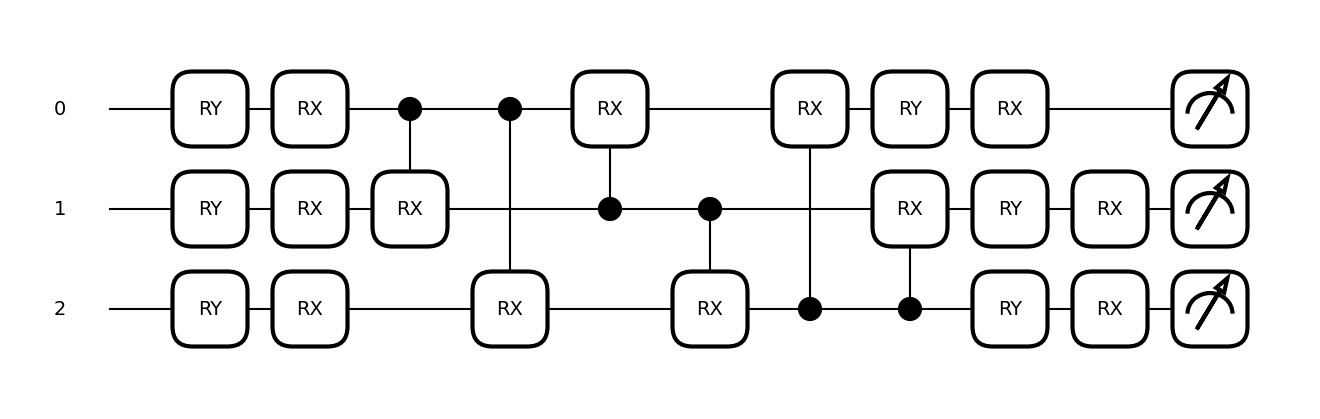

In [9]:
qml.draw_mpl(test_V_QA)(test_alpha)

(<Figure size 2500x600 with 1 Axes>, <Axes: >)

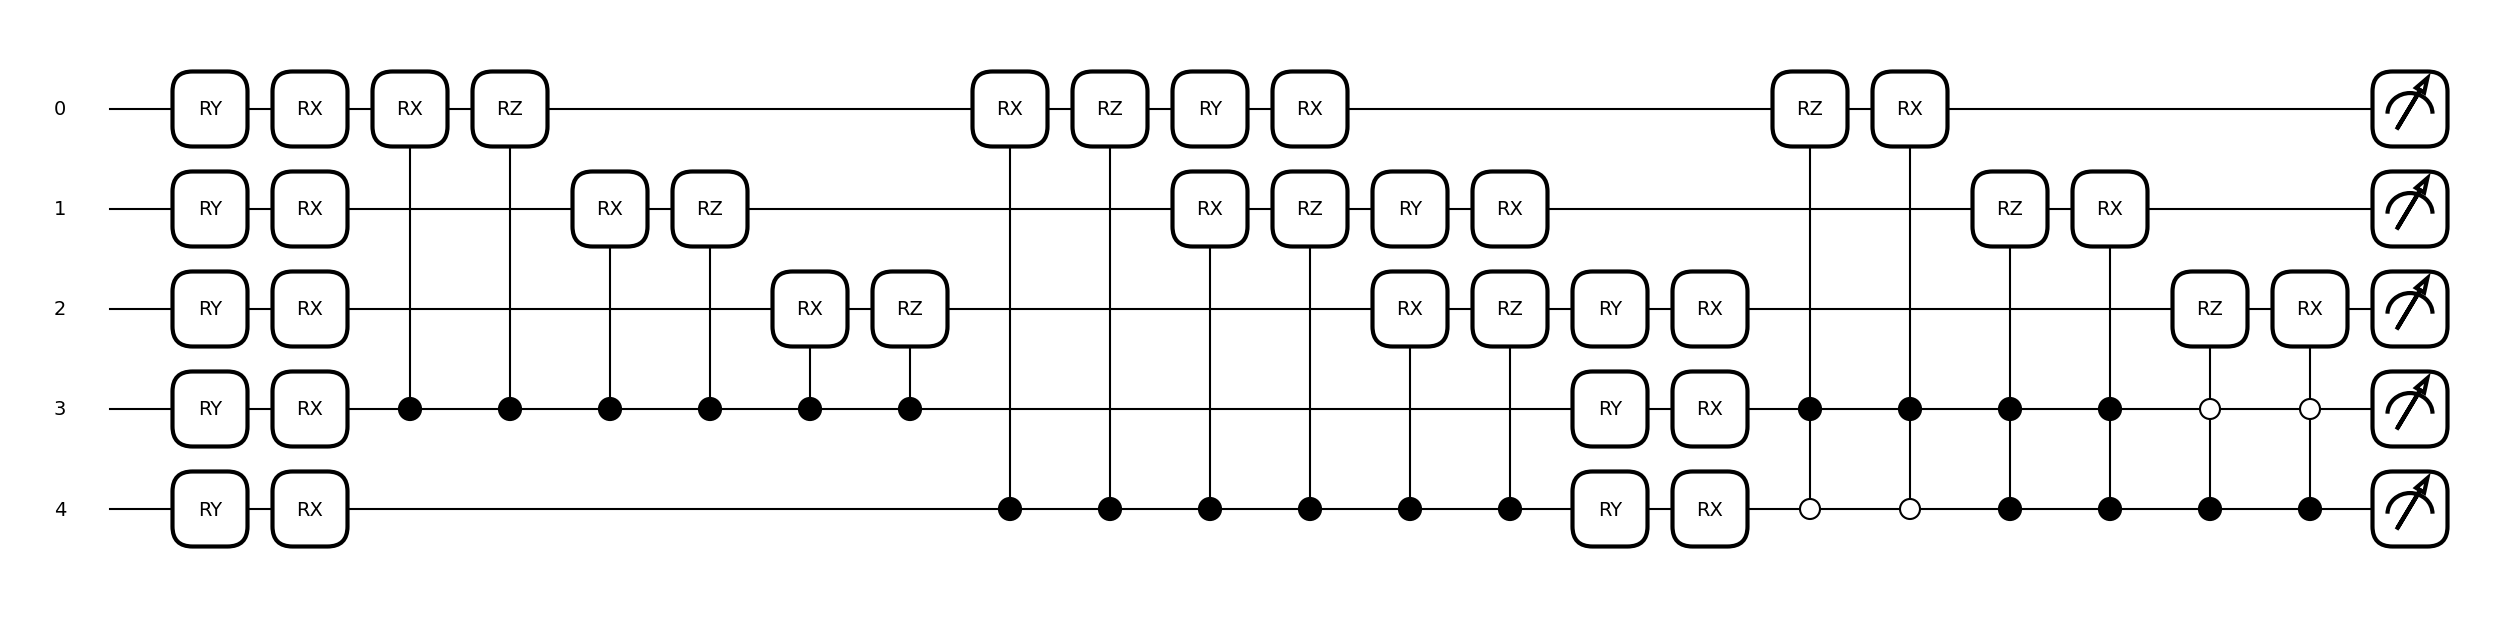

In [10]:
qml.draw_mpl(test_W_QAB)(test_beta)

# Constants

In [ ]:
bitflip_probability = 0.5
phaseflip_probability = 0.1

Q_qubits = 1
A_qubits = 2
B_qubits = 2

Q_wires = list(range(Q_qubits))
A_wires = list(range(Q_qubits, Q_qubits + A_qubits))
B_wires = list(range(Q_qubits + A_qubits, Q_qubits + A_qubits + B_qubits))

dim = 2 ** (Q_qubits + A_qubits)

# Gradient Descent 
stepsize = 0.01
momentum = 0.95

# Number of iterations
num_its = 100

# Number of simulations
num_sim = 50

# Baseline Fidelity
f_0 = 0.822

# Unitary matrix to test
U = qml.T.compute_matrix()

# Calculate Hamiltonians for Fidelity and Wasserstein

In [12]:
dev = qml.device('default.mixed', wires=Q_qubits + A_qubits + B_qubits)

# Get the fidelity hamiltonian matrix from the 0 state
@qml.qnode(dev)
def fiduciary_density(wires):
    return qml.density_matrix(wires)

#Calculate the hamiltonian for the fiduciary cost
H_QA_fid = np.identity(dim) - fiduciary_density(Q_wires + A_wires)

def wass_hamiltonian():
    H_wass = np.zeros((dim, dim))
    for i in range (1, dim):
        vec = np.zeros((dim, 1))
        vec[i, 0] = 1
        
        # Binary 011, 101, 110
        if i == 3 or i == 5 or i == 6:
            density_mat = 2 * np.outer(vec, vec.T)
        # Binary 111
        elif i == 7:
            density_mat = 3 * np.outer(vec, vec.T)
        # Binary 001, 010, 100
        else:
            density_mat = np.outer(vec, vec.T)
            
        H_wass += density_mat
    return H_wass

H_QA_wass = wass_hamiltonian()

# Implementation of the VQA returning the density matrix for fidelity calculations

In [81]:
@qml.qnode(dev)
def fidelity_state(U, alpha, beta, bitFlip=True):
    prepare_Q(U, Q_wires)
    prepare_V_QA(alpha, Q_wires + A_wires)

    # Insert noise according to boolean value
    if (bitFlip):
        qml.BitFlip(bitflip_probability, wires=Q_wires)
        qml.BitFlip(bitflip_probability, wires=A_wires[0])
        qml.BitFlip(bitflip_probability, wires=A_wires[1])
    else: 
        qml.PhaseFlip(phaseflip_probability, wires=Q_wires)
        qml.PhaseFlip(phaseflip_probability, wires=A_wires[0])
        qml.PhaseFlip(phaseflip_probability, wires=A_wires[1])
    
    prepare_W_QAB(beta, Q_wires + A_wires + B_wires)
    qml.adjoint(prepare_V_QA)(alpha, Q_wires + A_wires)
    qml.adjoint(prepare_Q)(U, Q_wires)
    return qml.state(wires=[0,1,2])
    

@qml.qnode(dev)
def wasserstein_state(U, alpha, beta, bitFlip=True):
    prepare_Q(U, Q_wires)
    prepare_V_QA(alpha, Q_wires + A_wires)

    # Insert noise according to boolean value
    if (bitFlip):
        qml.BitFlip(bitflip_probability, wires=Q_wires)
        qml.BitFlip(bitflip_probability, wires=A_wires[0])
        qml.BitFlip(bitflip_probability, wires=A_wires[1])
    else: 
        qml.PhaseFlip(phaseflip_probability, wires=Q_wires)
        qml.PhaseFlip(phaseflip_probability, wires=A_wires[0])
        qml.PhaseFlip(phaseflip_probability, wires=A_wires[1])

    prepare_W_QAB(beta, Q_wires + A_wires + B_wires)
    qml.adjoint(prepare_V_QA)(alpha, Q_wires + A_wires)
    qml.adjoint(prepare_Q)(U, Q_wires)
    
    return qml.state(wires=[0,1,2])

# Implementation of the VQA returning the cost

In [69]:
@qml.qnode(dev)
def VQA_fidelity(U, alpha, beta, bitFlip=True):
    prepare_Q(U, Q_wires)
    prepare_V_QA(alpha, Q_wires + A_wires)

    # Insert noise according to boolean value
    if (bitFlip):
        qml.BitFlip(bitflip_probability, wires=Q_wires)
        qml.BitFlip(bitflip_probability, wires=A_wires[0])
        qml.BitFlip(bitflip_probability, wires=A_wires[1])
    else: 
        qml.PhaseFlip(phaseflip_probability, wires=Q_wires)
        qml.PhaseFlip(phaseflip_probability, wires=A_wires[0])
        qml.PhaseFlip(phaseflip_probability, wires=A_wires[1])
    
    prepare_W_QAB(beta, Q_wires + A_wires + B_wires)
    qml.adjoint(prepare_V_QA)(alpha, Q_wires + A_wires)
    qml.adjoint(prepare_Q)(U, Q_wires)
    return qml.expval(qml.Hermitian(H_QA_fid, wires=[0,1,2]))
    

@qml.qnode(dev)
def VQA_wasserstein(U, alpha, beta, bitFlip=True):
    prepare_Q(U, Q_wires)
    prepare_V_QA(alpha, Q_wires + A_wires)

    # Insert noise according to boolean value
    if (bitFlip):
        qml.BitFlip(bitflip_probability, wires=Q_wires)
        qml.BitFlip(bitflip_probability, wires=A_wires[0])
        qml.BitFlip(bitflip_probability, wires=A_wires[1])
    else: 
        qml.PhaseFlip(phaseflip_probability, wires=Q_wires)
        qml.PhaseFlip(phaseflip_probability, wires=A_wires[0])
        qml.PhaseFlip(phaseflip_probability, wires=A_wires[1])

    prepare_W_QAB(beta, Q_wires + A_wires + B_wires)
    qml.adjoint(prepare_V_QA)(alpha, Q_wires + A_wires)
    qml.adjoint(prepare_Q)(U, Q_wires)
    
    return qml.expval(qml.Hermitian(H_QA_wass, wires=[0,1,2]))

# Cost Function (Fidelity)

In [76]:
def fidelity_cost_bitflip_noise(U):
    # Wasn't sure if I was supposed to get the density matrix at the end of the circuit, or after applying W and before the adjoints
    # Based off my understanding of the paper and eq. 4, I think it should be at the end as is, but may want to look at this assumption again
    
    def compute_cost(alpha, beta):
        # Matrix multiply, or tensor product? Also had to abs value it, or else it would complain we can't do grad descent on imaginary numbers
        return VQA_fidelity(U, alpha, beta, True)

    return compute_cost

In [77]:
def fidelity_cost_phaseflip_noise(U):
    # Wasn't sure if I was supposed to get the density matrix at the end of the circuit, or after applying W and before the adjoints
    # Based off my understanding of the paper and eq. 4, I think it should be at the end as is, but may want to look at this assumption again
    
    def compute_cost(alpha, beta):
        # Matrix multiply, or tensor product? Also had to abs value it, or else it would complain we can't do grad descent on imaginary numbers
        return VQA_fidelity(U, alpha, beta, False)

    return compute_cost

In [78]:
def wasserstein_cost_bitflip_noise(U):
    def compute_cost(alpha, beta):
        return VQA_wasserstein(U, alpha, beta, True)
    
    return compute_cost

In [79]:
def wasserstein_cost_phaseflip_noise(U):
    def compute_cost(alpha, beta):
        return VQA_wasserstein(U, alpha, beta, False)
    
    return compute_cost

Now we can use `fidelity_cost_bitflip_noise()` and perform gradient descent

In [80]:
alpha = test_alpha # arbitrary
beta = test_beta # arbitrary

test_U = U # use the previous U we've been using in our tests

opt = qml.MomentumOptimizer(stepsize, momentum)

running_costs = []

for _ in range(num_its):
    (alpha, beta), _cost = opt.step_and_cost(fidelity_cost_bitflip_noise(test_U), alpha, beta)
    running_costs.append(_cost)

KeyboardInterrupt: 

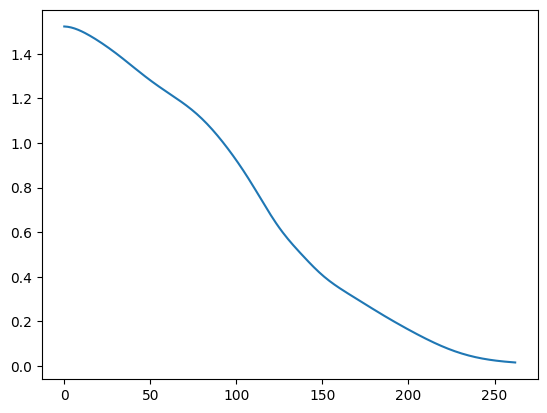

In [38]:
import matplotlib.pyplot as plt

plt.plot(running_costs)

In [36]:
print(f"Alpha: {alpha}")
print(f"Beta: {beta}")

Alpha: [ 2.02012114  2.12103962  0.90694488 -0.31650389  0.31961303  2.867484
  2.30381306  0.06376864  0.21863985  3.24248062  1.70300879  0.24578058
  1.48211872  2.48572659  0.40240717  2.5407023   0.68129566  1.76398505]
Beta: [ 1.76027945  1.76803764  2.66927767  1.95585917  1.55631884  0.43421055
  0.25008607  0.85473997  3.65481029  2.72705971  1.59617566  1.2300682
  0.56481752  2.10614969  0.73249205  3.06120708  1.34073198  3.0570948
  3.55966503  0.61500936  1.64244121 -0.54409214 -0.04433087  3.1167009
  3.20463729 -0.38599712  3.26018241  1.17354397  3.27548263  1.12306819
  3.13549018 -0.00926976  2.39431444  2.87852641  0.83921528  1.61622417
  0.8283068   1.53557632]


Now we can use `wasserstein_cost_bitflip_noise()` and perform gradient descent

In [39]:
alpha = test_alpha # arbitrary
beta = test_beta # arbitrary

test_U = U # use the previous U we've been using in our tests

opt = qml.MomentumOptimizer(stepsize, momentum)

running_costs = []

for _ in range(num_its):
    (alpha, beta), _cost = opt.step_and_cost(wasserstein_cost_bitflip_noise(test_U), alpha, beta)
    running_costs.append(_cost)

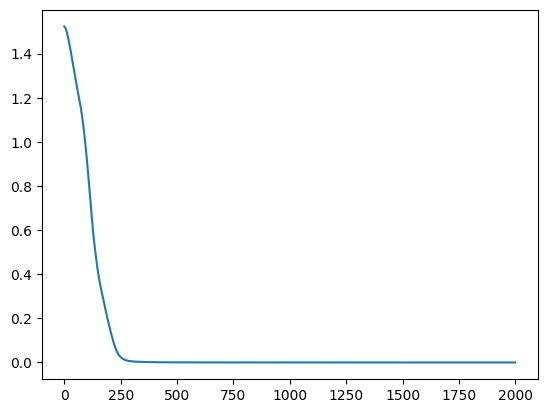

In [40]:
import matplotlib.pyplot as plt

plt.plot(running_costs)

In [29]:
print(f"Alpha: {alpha}")
print(f"Beta: {beta}")

Alpha: [ 1.89096339  1.99366169  0.76375988 -0.200536    0.15604454  2.88399591
  2.28251155  0.00334662  0.12220109  3.1768591   1.6524916   0.22195143
  1.52571778  2.45979598  0.37062     2.48316853  0.72068911  1.80043963]
Beta: [ 1.84349137e+00  1.87755977e+00  2.77843955e+00  1.87858978e+00
  1.49889889e+00  8.05404075e-02  6.01376393e-02  8.37062127e-01
  3.67024630e+00  2.72759727e+00  1.57248812e+00  1.19107619e+00
  5.23646645e-01  2.08269750e+00  5.73877372e-01  3.14176378e+00
  1.40456139e+00  3.07493774e+00  3.55611748e+00  6.17568257e-01
  1.72714806e+00 -6.00812907e-01 -2.03992514e-04  3.14159341e+00
  3.14146256e+00 -5.43853128e-01  3.33066627e+00  1.14594963e+00
  3.14123835e+00  1.10662811e+00  3.14157672e+00 -2.23854299e-05
  2.39431444e+00  2.87852641e+00  7.51300622e-01  1.57000470e+00
  8.35629927e-01  1.57030272e+00]


# Reproducing Results

In [60]:
def simulation(alpha, beta, U, momentum, noiseModel, calculate_state, bitFlip):
    alpha = alpha 
    beta = test_beta 

    test_U = U 

    opt = qml.MomentumOptimizer(stepsize, momentum)

    running_costs = []

    iterations = 0

    while iterations < num_its:
        (alpha, beta), _cost = opt.step_and_cost(noiseModel(test_U), alpha, beta)
        running_costs.append(_cost)
        
        if _cost == 0:
            break
        
        iterations += 1

    finalState = calculate_state(U, alpha, beta, bitFlip)
    fidelity = qml.math.fidelity(U, finalState)
    
    return alpha, beta, iterations, fidelity


## Bitflip results

In [100]:
fidelityIterations = []
fidelityFidelity = []

for i in range(num_sim):
    _, _, iterations, fidelity = simulation(test_alpha, test_beta, test_U, momentum, fidelity_cost_bitflip_noise, fidelity_state, True)

    if fidelity > f_0:
        fidelityIterations.append(iterations)
        fidelityFidelity.append(fidelity)


In [101]:
wassIterations = []
wassFidelity = []

for i in range(num_sim):
    _, _, iterations, fidelity = simulation(test_alpha, test_beta, test_U, momentum, wasserstein_cost_bitflip_noise, wasserstein_state, True)

    if fidelity > f_0:
        wassIterations.append(iterations)
        wassFidelity.append(fidelity)


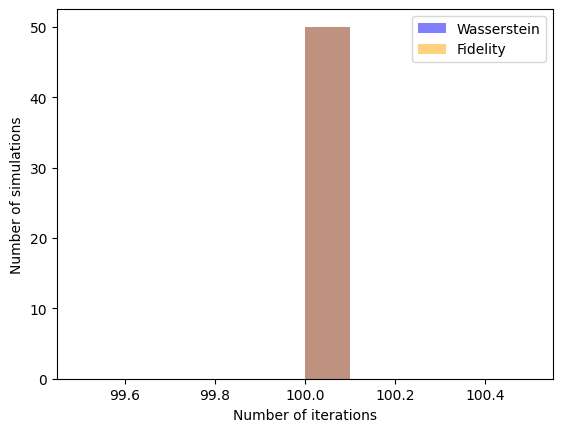

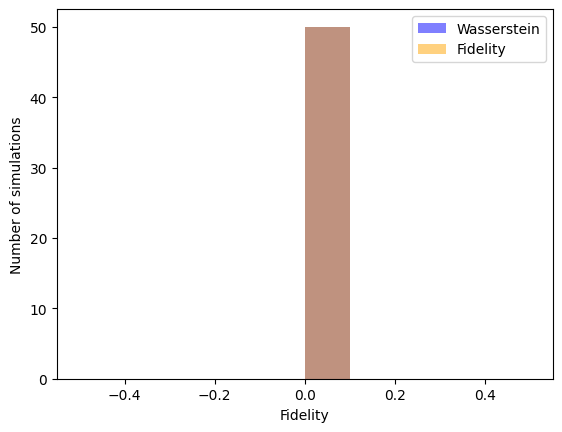

In [102]:
plt.hist(wassIterations, color='blue', label='Wasserstein', alpha=0.5)
plt.hist(fidelityIterations, color='orange', label='Fidelity', alpha=0.5)

plt.xlabel("Number of iterations")
plt.ylabel("Number of simulations")
plt.legend(loc='upper right')
plt.show()

plt.hist(wassFidelity, color='blue', label='Wasserstein', alpha=0.5)
plt.hist(fidelityFidelity, color='orange', label='Fidelity', alpha=0.5)
plt.xlabel("Fidelity")
plt.ylabel("Number of simulations")
plt.legend(loc='upper right')
plt.show()

## Phaseflip Results

In [103]:
fidelityIterations = []
fidelityFidelity = []

for i in range(num_sim):
    _, _, iterations, fidelity = simulation(test_alpha, test_beta, test_U, momentum, fidelity_cost_phaseflip_noise, fidelity_state, False)

    if fidelity > f_0:
        fidelityIterations.append(iterations)
        fidelityFidelity.append(fidelity)


KeyboardInterrupt: 

In [ ]:
wassIterations = []
wassFidelity = []

for i in range(num_sim):
    _, _, iterations, fidelity = simulation(test_alpha, test_beta, test_U, momentum, wasserstein_cost_phaseflip_noise, wasserstein_state, False)

    if fidelity > f_0:
        wassIterations.append(iterations)
        wassFidelity.append(fidelity)


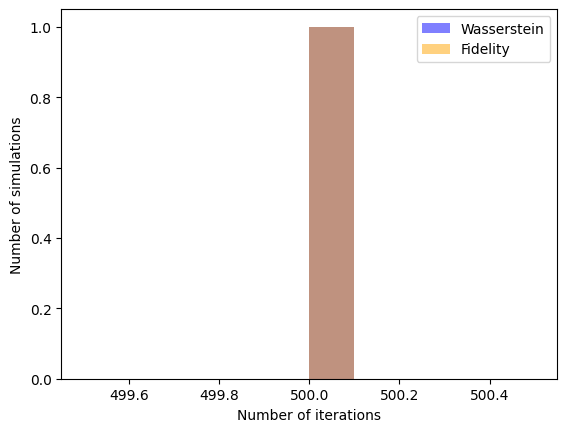

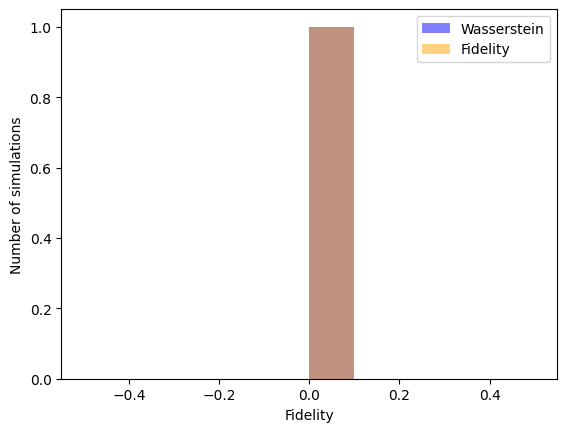

In [ ]:
plt.hist(wassIterations, color='blue', label='Wasserstein', alpha=0.5)
plt.hist(fidelityIterations, color='orange', label='Fidelity', alpha=0.5)

plt.xlabel("Number of iterations")
plt.ylabel("Number of simulations")
plt.legend(loc='upper right')
plt.show()

plt.hist(wassFidelity, color='blue', label='Wasserstein', alpha=0.5)
plt.hist(fidelityFidelity, color='orange', label='Fidelity', alpha=0.5)
plt.xlabel("Fidelity")
plt.ylabel("Number of simulations")
plt.legend(loc='upper right')
plt.show()

## Wasserstein then Fidelity

In [ ]:
fidelityDiff = []
for i in range(num_sim):
    wassAlpha, wassBeta, _, wassFidelity = simulation(test_alpha, test_beta, test_U, momentum, wasserstein_cost_phaseflip_noise, wasserstein_state, False)

    _, _, _, fidelityFidelity = simulation(wassAlpha, wassBeta, test_U, momentum, fidelity_cost_phaseflip_noise, fidelity_state, False)

    fidelityDiff.append(fidelityDiff - wassFidelity)



plt.hist(fidelityDiff, color='blue')

plt.xlabel("Fidelity")
plt.ylabel("Number of simulations")
plt.show()

## Fidelity then Wasserstein

In [ ]:
fidelityDiff = []
for i in range(num_sim):
    fidelityAlpha, fidelityBeta, _, fidelityFidelity = simulation(test_alpha, test_beta, test_U, momentum, fidelity_cost_phaseflip_noise, fidelity_state, False)

    _, _, _, fidelityFidelity = simulation(fidelityAlpha, fidelityBeta, test_U, momentum, wasserstein_cost_phaseflip_noise, wasserstein_state, False)

    fidelityDiff.append(fidelityDiff - fidelityFidelity)


plt.hist(fidelityDiff, color='orange')

plt.xlabel("Fidelity")
plt.ylabel("Number of simulations")
plt.show()